In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [29]:
df = pd.read_csv("Final.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_1,...,Item_Type_Combined_2,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.922960,Dairy,249.8092,OUT049,1999,3735.1380,14,False,...,False,False,False,False,False,False,False,False,False,True
1,DRC01,5.92,1.003057,Soft Drinks,48.2692,OUT018,2009,443.4228,4,False,...,False,False,False,True,False,False,False,False,False,False
2,FDN15,17.50,0.831990,Meat,141.6180,OUT049,1999,2097.2700,14,False,...,False,False,False,False,False,False,False,False,False,True
3,FDX07,19.20,0.750000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,15,False,...,False,False,False,False,False,False,False,False,False,False
4,NCD19,8.93,0.666667,Household,53.8614,OUT013,1987,994.7052,26,True,...,True,True,False,False,False,False,False,False,False,False


In [30]:
df.shape

(8519, 30)

In [31]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years
count,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000
mean,12.875420,1.000000,141.010019,1997.837892,2181.188779,15.162108
std,4.646098,0.196805,62.283594,8.369105,1706.511093,8.369105
min,4.555000,0.636364,31.290000,1985.000000,33.290000,4.000000
25%,8.785000,0.888335,93.844900,1987.000000,834.247400,9.000000
50%,12.650000,0.943167,143.047000,1999.000000,1794.331000,14.000000
75%,16.850000,1.003298,185.676600,2004.000000,3100.630600,26.000000
max,21.350000,1.819614,266.888400,2009.000000,13086.964800,28.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8519 entries, 0 to 8518
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Visibility            8519 non-null   float64
 3   Item_Type                  8519 non-null   object 
 4   Item_MRP                   8519 non-null   float64
 5   Outlet_Identifier          8519 non-null   object 
 6   Outlet_Establishment_Year  8519 non-null   int64  
 7   Item_Outlet_Sales          8519 non-null   float64
 8   Outlet_Years               8519 non-null   int64  
 9   Item_Fat_Content_1         8519 non-null   bool   
 10  Item_Fat_Content_2         8519 non-null   bool   
 11  Outlet_Location_Type_1     8519 non-null   bool   
 12  Outlet_Location_Type_2     8519 non-null   bool   
 13  Outlet_Size_1              8519 non-null   bool 

In [33]:
remove_cols = [
    'Item_Identifier',
    'Item_Type',
    'Outlet_Identifier',
    'Outlet_Establishment_Year'
]
df = df.drop(remove_cols,axis =1)
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,...,Item_Type_Combined_2,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.30,0.922960,249.8092,3735.1380,14,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
1,5.92,1.003057,48.2692,443.4228,4,False,True,False,True,True,...,False,False,False,True,False,False,False,False,False,False
2,17.50,0.831990,141.6180,2097.2700,14,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
3,19.20,0.750000,182.0950,732.3800,15,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,8.93,0.666667,53.8614,994.7052,26,True,False,False,True,False,...,True,True,False,False,False,False,False,False,False,False


In [34]:
df.shape

(8519, 26)

<Axes: >

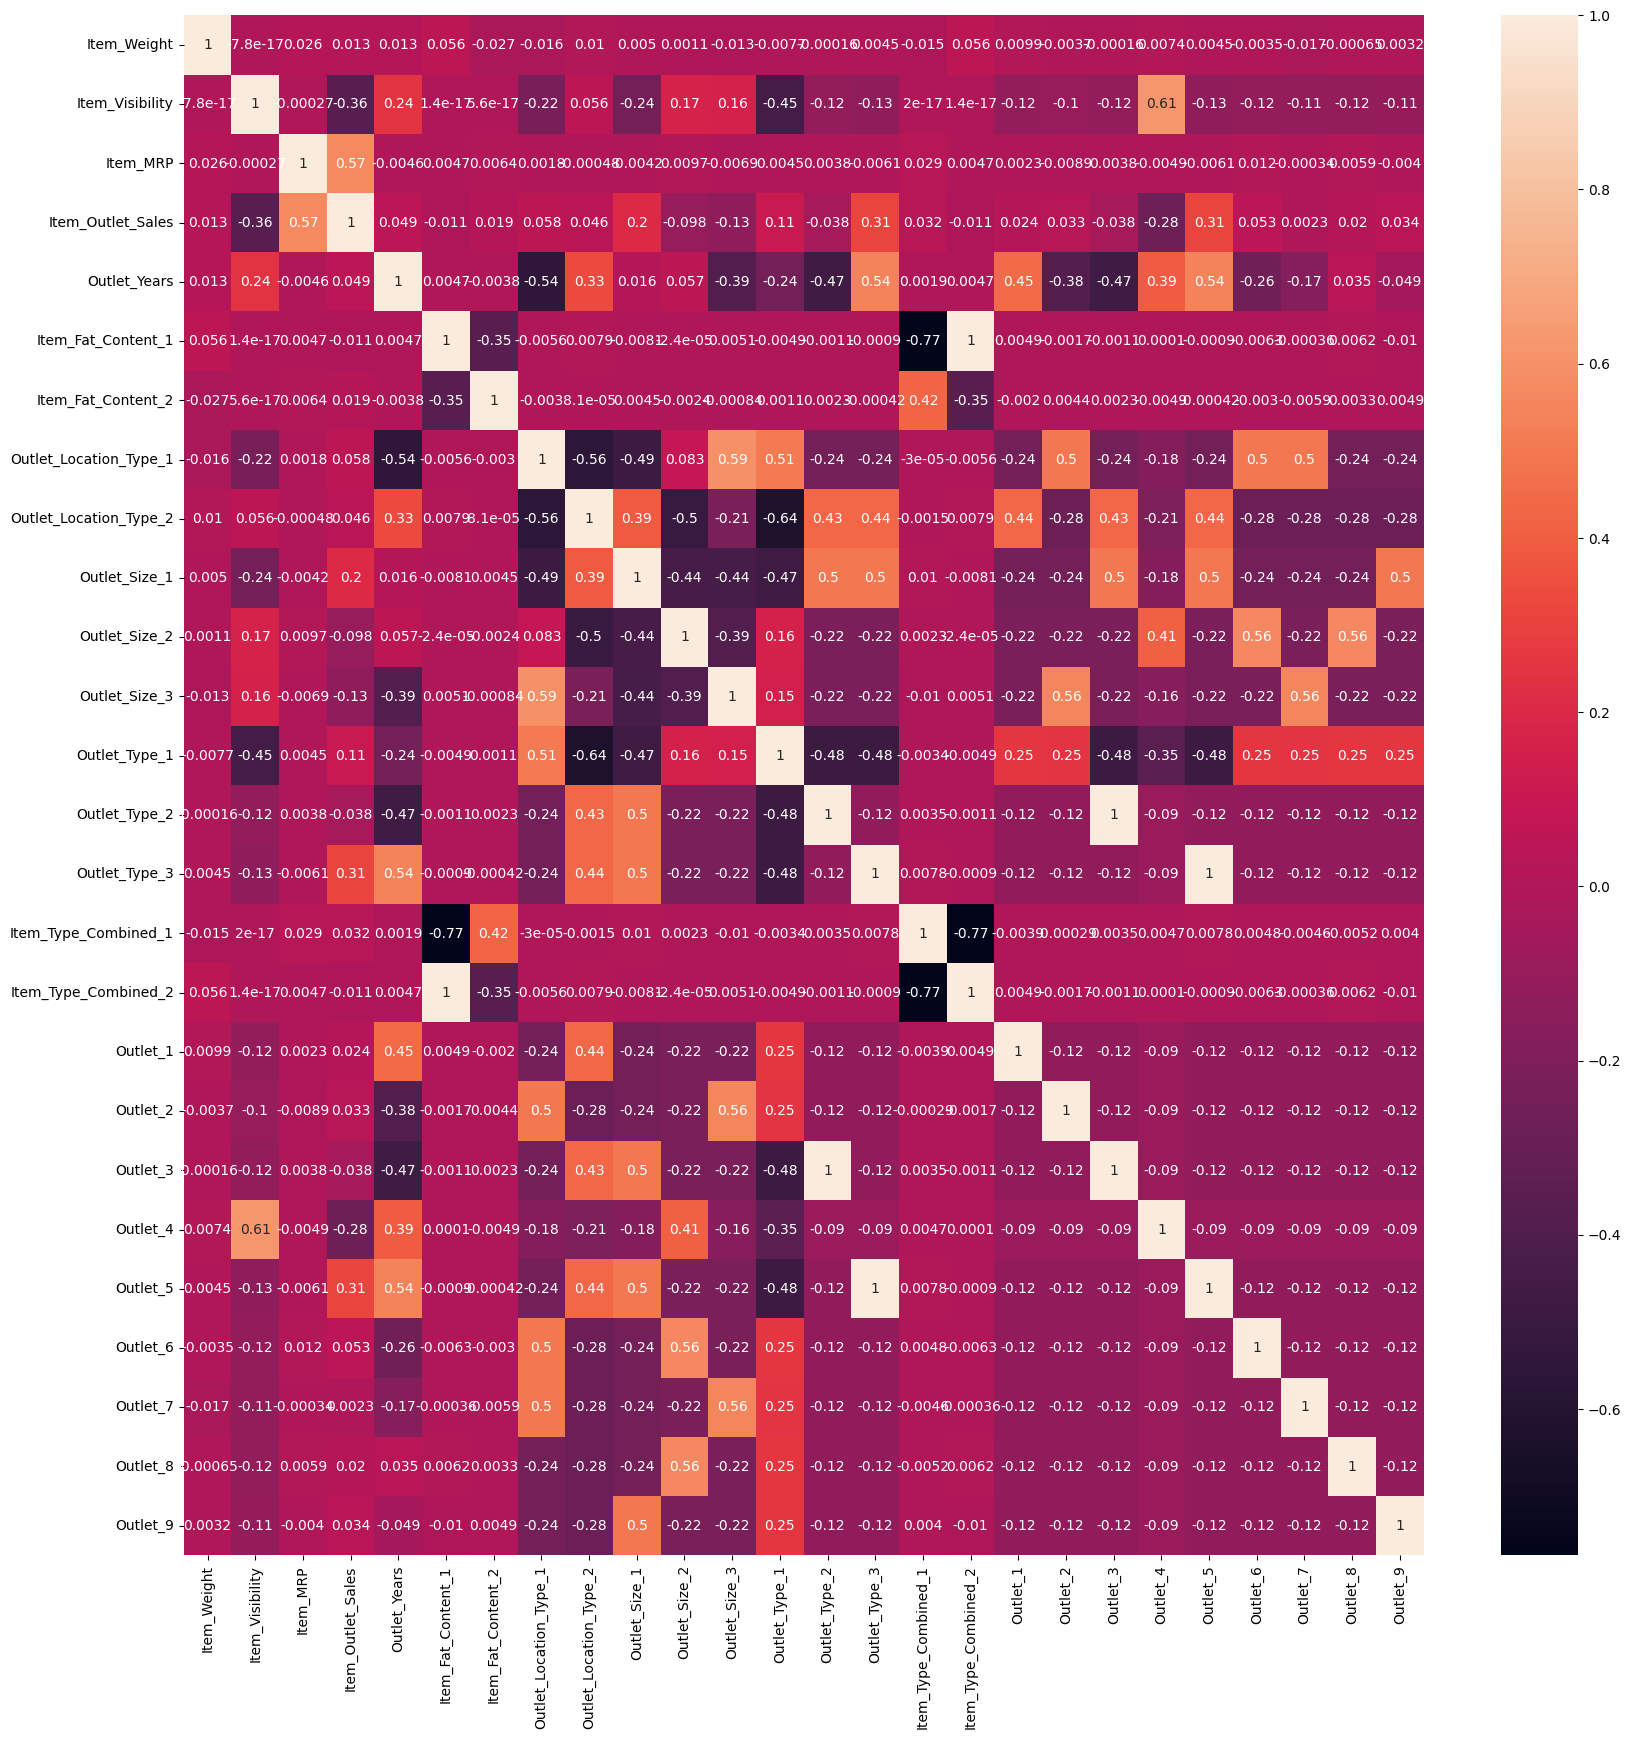

In [35]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot = True)

In [36]:
y = df.Item_Outlet_Sales.values
X = df.drop('Item_Outlet_Sales',axis = 1)

In [37]:
print(X.shape,y.shape)

(8519, 25) (8519,)


In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [39]:
cols = [ 
    'Item_Weight',
    'Item_Visibility',
    'Item_MRP',
    'Outlet_Years'
]
X[cols]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years
0,9.300,0.922960,249.8092,14
1,5.920,1.003057,48.2692,4
2,17.500,0.831990,141.6180,14
3,19.200,0.750000,182.0950,15
4,8.930,0.666667,53.8614,26
...,...,...,...,...
8514,6.865,0.920247,214.5218,26
8515,8.380,1.000657,108.1570,11
8516,10.600,0.999512,85.1224,9
8517,7.210,1.031393,103.1332,4


In [40]:
X[cols]  =  sc.fit_transform(X[cols])

In [41]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,...,Item_Type_Combined_2,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,-0.769598,-0.391478,1.746938,-0.138865,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1,-1.497133,0.015532,-1.489096,-1.333806,False,True,False,True,True,False,...,False,False,False,True,False,False,False,False,False,False
2,0.995427,-0.853739,0.009762,-0.138865,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,1.361347,-1.270366,0.659682,-0.019371,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-0.849240,-1.693822,-1.399305,1.295064,True,False,False,True,False,False,...,True,True,False,False,False,False,False,False,False,False


In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model = LinearRegression()
model.fit(X_scaled, y)

LinearRegression()

In [43]:
model.fit(X,y)

LinearRegression()

In [44]:
y_pred = model.predict(X)

In [45]:
from sklearn.metrics import r2_score,mean_squared_error
score = r2_score(y,y_pred)
print("Score of Training:",score)
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y,y_pred)))

Score of Training: 0.5632782566377577
RMSE : 1128


In [46]:
from sklearn.metrics import mean_squared_error,make_scorer,mean_absolute_error
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(model,X, y, cv=20, scoring = make_scorer(mean_squared_error))
cv_score = np.sqrt(np.abs(cv_score))
print("\nModel Report")
print("MAE : %.4g" % np.sqrt(mean_absolute_error(y,y_pred)))
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y,y_pred)))
print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))


Model Report
MAE : 28.92
RMSE : 1128
CV Score : Mean - 1129 | Std - 42.82 | Min - 1074 | Max - 1211


In [47]:
model.coef_

array([ 3.98642503e-01, -2.48441207e+00,  9.68076285e+02, -7.85463912e+14,
       -4.60134601e+12,  4.19498958e+01,  1.18904905e+16,  2.08862709e+16,
        1.67130716e+15,  3.56071228e+15, -7.76847000e+15,  2.42995151e+15,
       -5.20324769e+15, -4.10115515e+15,  1.87666685e+01,  4.60134601e+12,
       -9.16598020e+15,  5.72110414e+15, -5.26897077e+15,  1.07772465e+16,
       -4.11846410e+15, -5.32650324e+15,  6.19039564e+15,  7.22099541e+15,
        8.92268393e+15])

<Axes: title={'center': 'Model Coefficients'}>

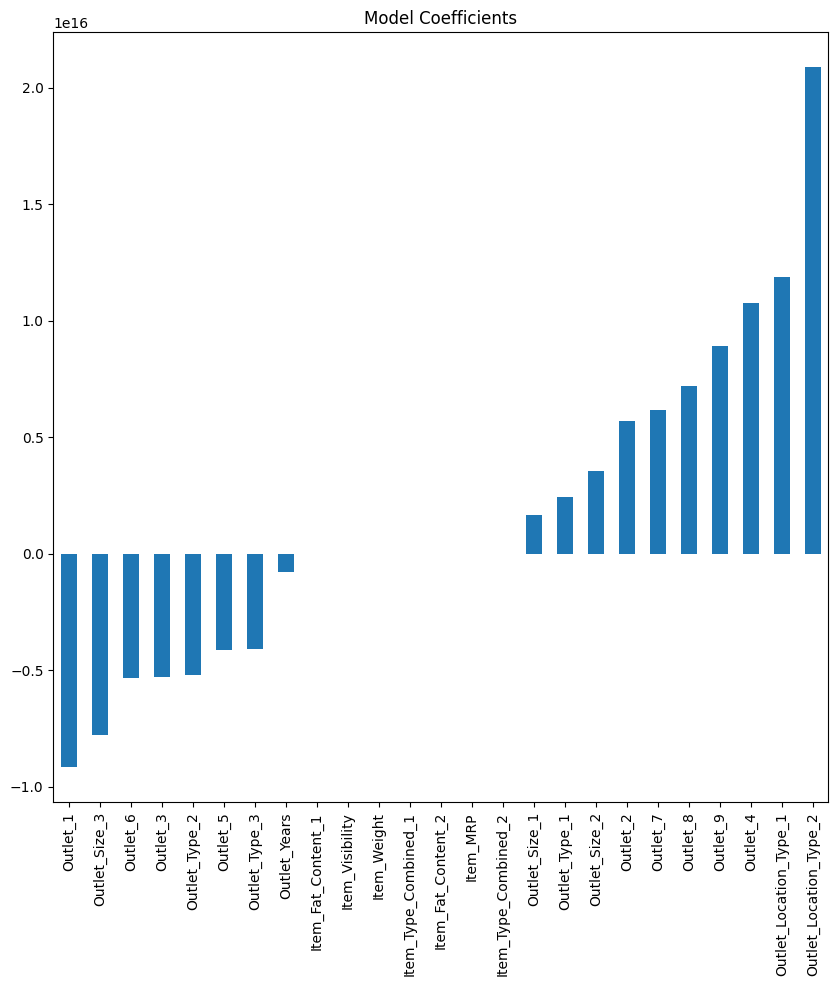

In [48]:
coef2 = pd.Series(model.coef_ ,X.columns).sort_values()
plt.figure(figsize = (10,10))
coef2.plot(kind='bar', title='Model Coefficients')

In [49]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model_ridge = Ridge(alpha=0.05)
model_ridge.fit(X_scaled, y)

Ridge(alpha=0.05)

In [50]:
model_ridge.fit(X, y)

Ridge(alpha=0.05)

In [51]:
y_pred = model_ridge.predict(X)

In [52]:
score = r2_score(y,y_pred)
print("Score of Training:",score)
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y,y_pred)))

Score of Training: 0.5633685044075025
RMSE : 1128


In [53]:
from sklearn.metrics import mean_squared_error,make_scorer,mean_absolute_error
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(model,X, y, cv=20, scoring = make_scorer(mean_squared_error))
cv_score = np.sqrt(np.abs(cv_score))
print("\nModel Report")
print("MAE : %.4g" % np.sqrt(mean_absolute_error(y,y_pred)))
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y,y_pred)))
print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))


Model Report
MAE : 28.91
RMSE : 1128
CV Score : Mean - 1129 | Std - 42.82 | Min - 1074 | Max - 1211


<Axes: title={'center': 'Model Coefficients'}>

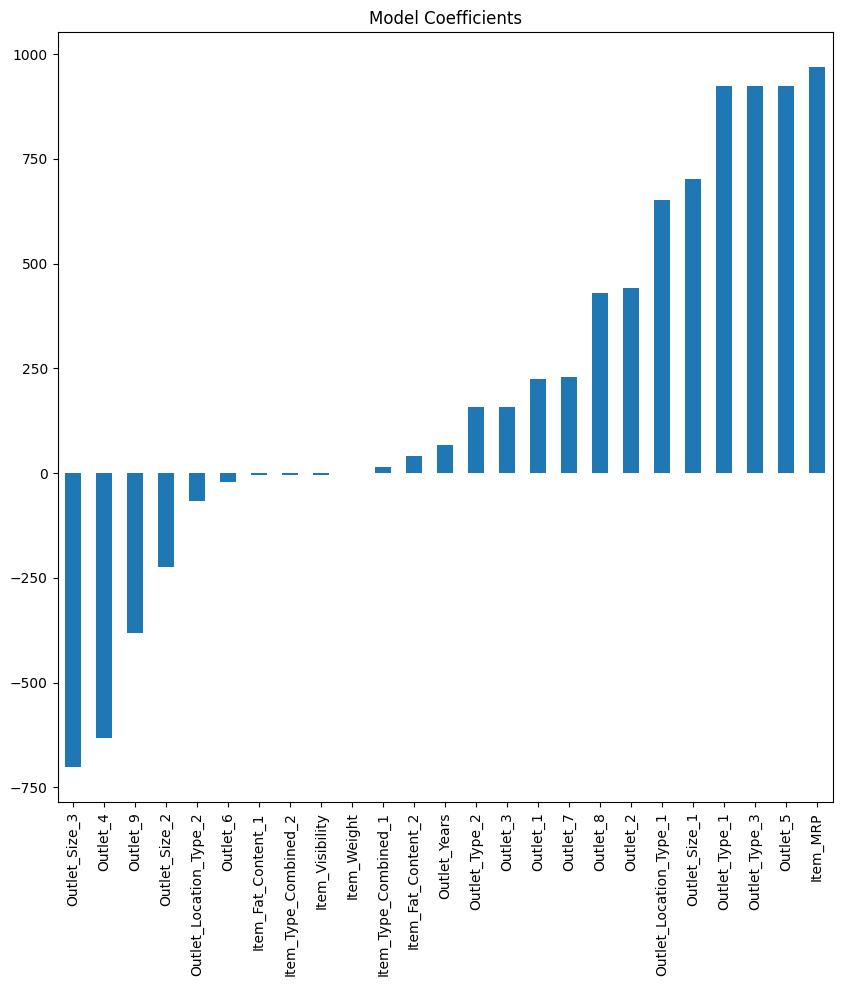

In [54]:
coef2 = pd.Series(model_ridge.coef_ ,X.columns).sort_values()
plt.figure(figsize = (10,10))
coef2.plot(kind='bar', title='Model Coefficients')